In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/Heart.csv')
df

,age,anaemia,creatinine phosphokinase,diabetes,ejection fraction,high bp,platelets,serum creatinine,serum sodium,sex,smoking,death
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,0


# **DATA CLEANING**



In [ ]:

df.isnull().sum()

age                         0
anaemia                     0
creatinine phosphokinase    0
diabetes                    0
ejection fraction           0
high bp                     0
platelets                   0
serum creatinine            0
serum sodium                0
sex                         0
smoking                     0
death                       0
dtype: int64

In [ ]:

duplicates = df.duplicated().sum()
print(duplicates)

0


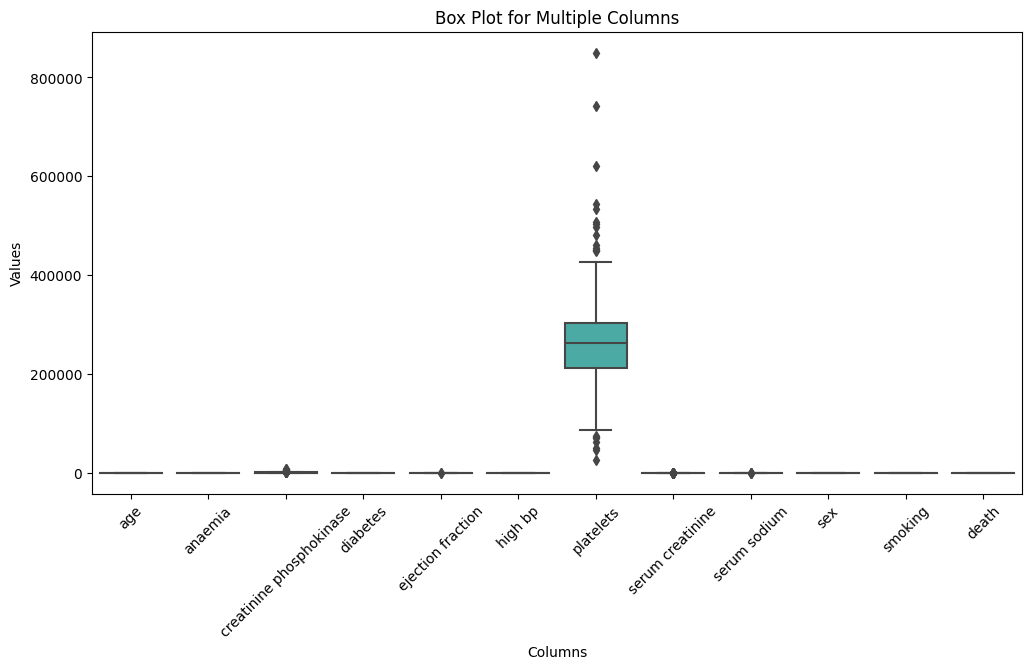

In [ ]:
columns_to_plot = ['age','anaemia','creatinine phosphokinase','diabetes','ejection fraction',	'high bp',	'platelets',	'serum creatinine'	,'serum sodium',	'sex',	'smoking',	'death']
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[columns_to_plot])
plt.xticks(rotation=45)
plt.xlabel("Columns")
plt.ylabel("Values")
plt.title("Box Plot for Multiple Columns")
plt.show()

In [ ]:

Q1 = df['platelets'].quantile(0.25)
Q3 = df['platelets'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['platelets'] < lower_bound) | (df['platelets'] > upper_bound)]
num_outliers = len(outliers)
num_outliers

21

In [ ]:
clean_df=df[(df['platelets'] >= lower_bound) & (df['platelets'] <= upper_bound)]
clean_df

,age,anaemia,creatinine phosphokinase,diabetes,ejection fraction,high bp,platelets,serum creatinine,serum sodium,sex,smoking,death
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
293,63.0,1,103,1,35,0,179000.00,0.9,136,1,1,0
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,0


In [ ]:
outliers2 = clean_df[(clean_df['platelets'] < lower_bound) | (clean_df['platelets'] > upper_bound)]
num_outliers2 = len(outliers2)
num_outliers2

0

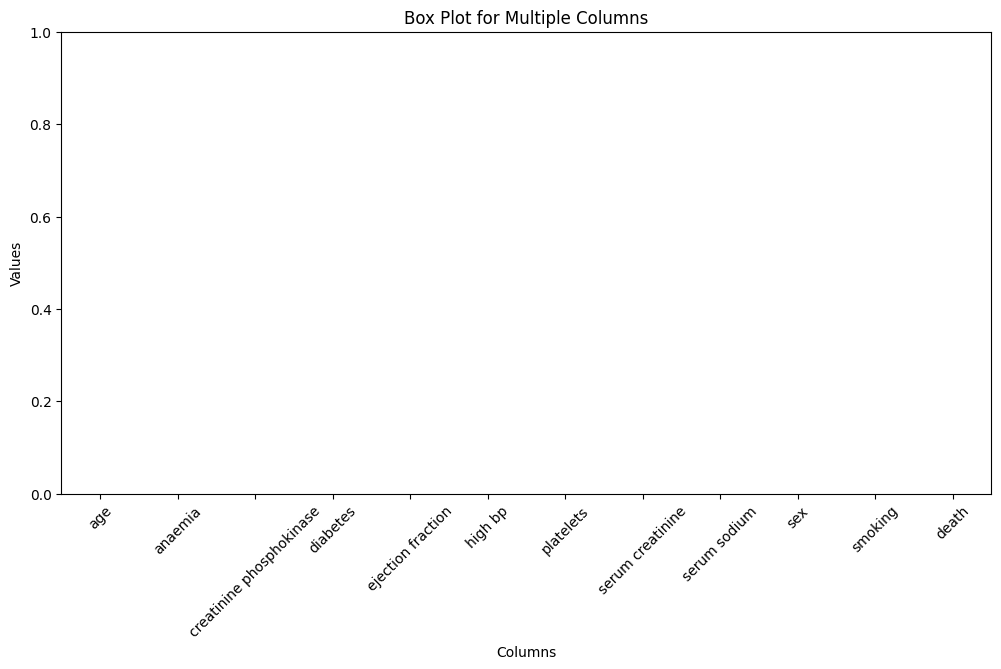

In [ ]:


columns_to_plot = ['age','anaemia','creatinine phosphokinase','diabetes','ejection fraction',	'high bp',	'platelets',	'serum creatinine'	,'serum sodium',	'sex',	'smoking',	'death']
plt.figure(figsize=(12, 6))
sns.boxplot(data=outliers2[columns_to_plot])
plt.xticks(rotation=45)
plt.xlabel("Columns")
plt.ylabel("Values")
plt.title("Box Plot for Multiple Columns")
plt.show()


# **DATA TRANSFORMATION**

In [ ]:
clean_df

,age,anaemia,creatinine phosphokinase,diabetes,ejection fraction,high bp,platelets,serum creatinine,serum sodium,sex,smoking,death
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
293,63.0,1,103,1,35,0,179000.00,0.9,136,1,1,0
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,0


In [ ]:
transformed_df = clean_df.copy()
transformed_df.loc[:, 'death'].replace({0: ' not dead', 1: 'dead'}, inplace=True)
transformed_df

,age,anaemia,creatinine phosphokinase,diabetes,ejection fraction,high bp,platelets,serum creatinine,serum sodium,sex,smoking,death
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,dead
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,dead
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,dead
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,dead
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,dead
...,...,...,...,...,...,...,...,...,...,...,...,...
293,63.0,1,103,1,35,0,179000.00,0.9,136,1,1,not dead
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,not dead
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,not dead
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,not dead


# **DATA MINING**

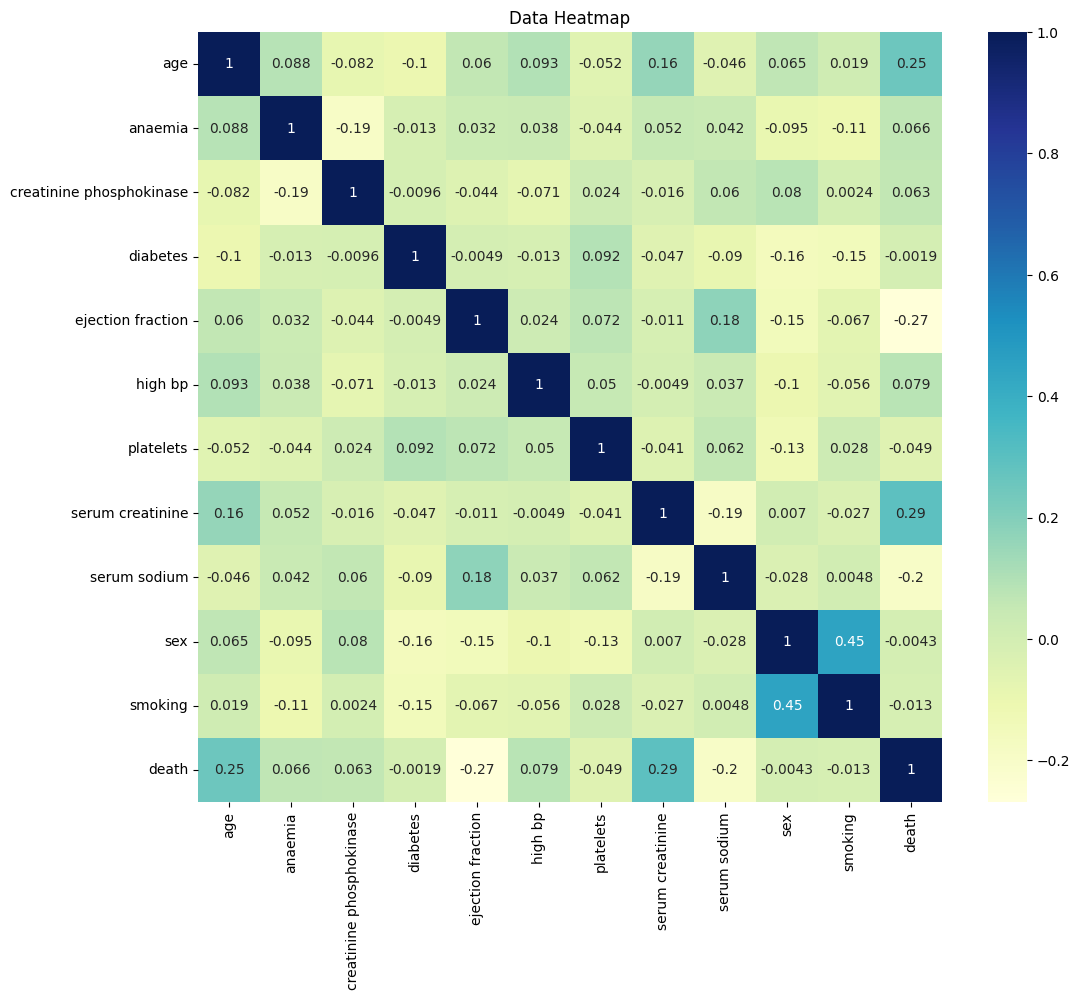

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
cor_df = df[['age', 'anaemia', 'creatinine phosphokinase', 'diabetes', 'ejection fraction', 'high bp', 'platelets', 'serum creatinine', 'serum sodium', 'sex', 'smoking', 'death']]

sns.heatmap(cor_df.corr(), annot=True, cmap='YlGnBu', annot_kws={"size": 10})

plt.title('Data Heatmap')

plt.show()

# **DATA VISUALIZATION**

In [ ]:
transformed_df

,age,anaemia,creatinine phosphokinase,diabetes,ejection fraction,high bp,platelets,serum creatinine,serum sodium,sex,smoking,death
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,dead
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,dead
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,dead
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,dead
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,dead
...,...,...,...,...,...,...,...,...,...,...,...,...
293,63.0,1,103,1,35,0,179000.00,0.9,136,1,1,not dead
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,not dead
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,not dead
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,not dead


In [ ]:
dfq1=transformed_df[['anaemia','death']]
dfq1 = dfq1.loc[dfq1['anaemia'] == 1]
dfq1

,anaemia,death
3,1,dead
4,1,dead
5,1,dead
6,1,dead
9,1,dead
...,...,...
278,1,not dead
284,1,not dead
285,1,not dead
289,1,not dead


In [ ]:
dfq1_total = dfq1['anaemia'].count()
print(f"The total number of patients with Anaemia is {dfq1_total}.")

dfq1_death = dfq1.loc[dfq1['death'] == 'dead']
num_patients_death_with_anemia = dfq1_death.shape[0]
print(f"The total number of patients who died of Heart Attack is {num_patients_death_with_anemia }.")


The total number of patients with Anaemia is 121.
The total number of patients who died of Heart Attack is 41.


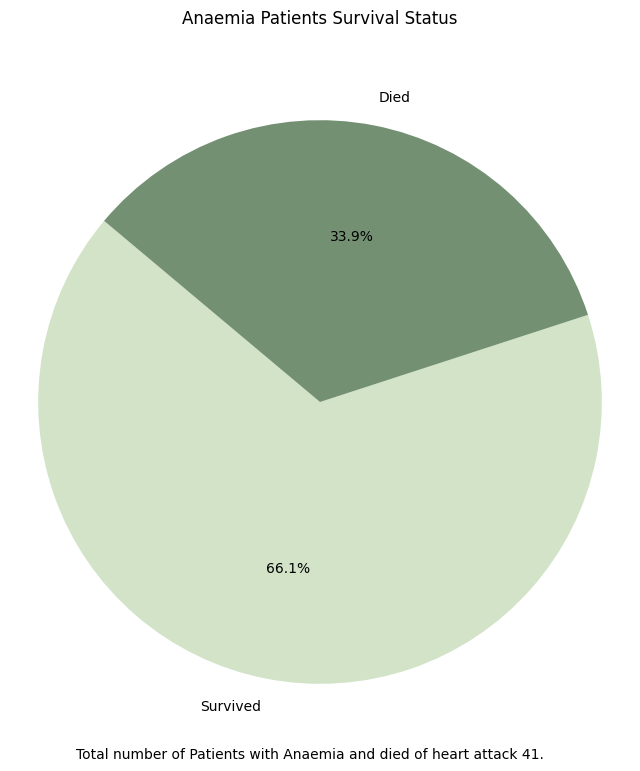

In [ ]:
labels = ['Survived', 'Died']
sizes = [dfq1_total - num_patients_death_with_anemia , num_patients_death_with_anemia ]
colors = ['#D2E3C8', '#739072']
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Anaemia Patients Survival Status\n\n\n')
textstr = f"\n\nTotal number of Patients with Anaemia and died of heart attack {num_patients_death_with_anemia }."
plt.gcf().text(0.5, 0.05, textstr, ha='center')
plt.show()

# **patients died of diabeties**

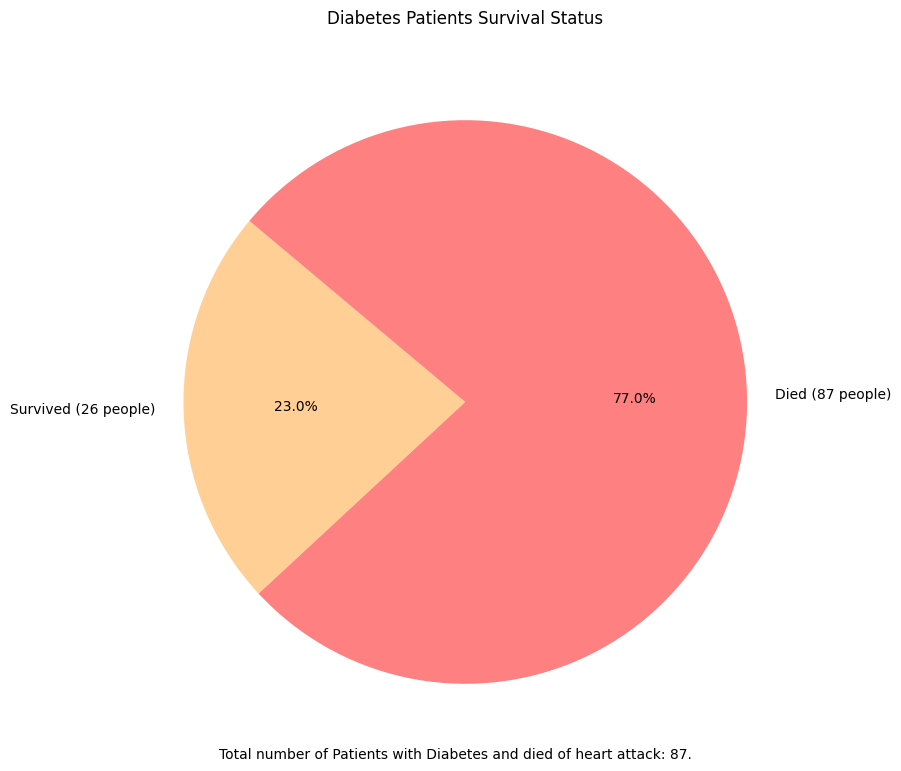

In [ ]:
dfq2 = transformed_df[['diabetes', 'death']]
dfq2_dia = dfq2.loc[dfq2['diabetes'] == 1]
dfq2_dia_total = dfq2_dia['diabetes'].count()
dfq2_death = dfq2.loc[dfq2['death'] == 'dead']
num_patients_died_with_diabetes = dfq2_death.shape[0]
survived_dia = dfq2_dia_total - num_patients_died_with_diabetes
labels_dia = [f'Survived ({survived_dia} people)', f'Died ({num_patients_died_with_diabetes} people)']
sizes_dia = [survived_dia, num_patients_died_with_diabetes]
colors_dia = ['#FFCF96', '#FF8080']
plt.figure(figsize=(8, 8))
plt.pie(sizes_dia, labels=labels_dia, colors=colors_dia, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Diabetes Patients Survival Status\n\n\n')
textstr_dia = f"\n\nTotal number of Patients with Diabetes and died of heart attack: {num_patients_died_with_diabetes}."
plt.gcf().text(0.5, 0.05, textstr_dia, ha='center')
plt.show()


# **patients died of smoking**

In [ ]:
dfq4=transformed_df[['smoking','death']]
dfq4 = dfq4.loc[dfq4['smoking'] == 1]
dfq4

,smoking,death
2,1,dead
5,1,dead
9,1,dead
10,1,dead
11,1,dead
...,...,...
292,1,not dead
293,1,not dead
294,1,not dead
297,1,not dead


In [ ]:
dfq4_total = dfq4['smoking'].count()
print(f"The total number of patients who smoke are {dfq4_total}.")

dfq4_death = dfq4.loc[dfq4['death'] == 'dead']
num_patients_death_who_smoke = dfq4_death.shape[0]
print(f"The total number of patients who died of Heart Attack is {num_patients_death_who_smoke}.")


The total number of patients who smoke are 89.
The total number of patients who died of Heart Attack is 27.


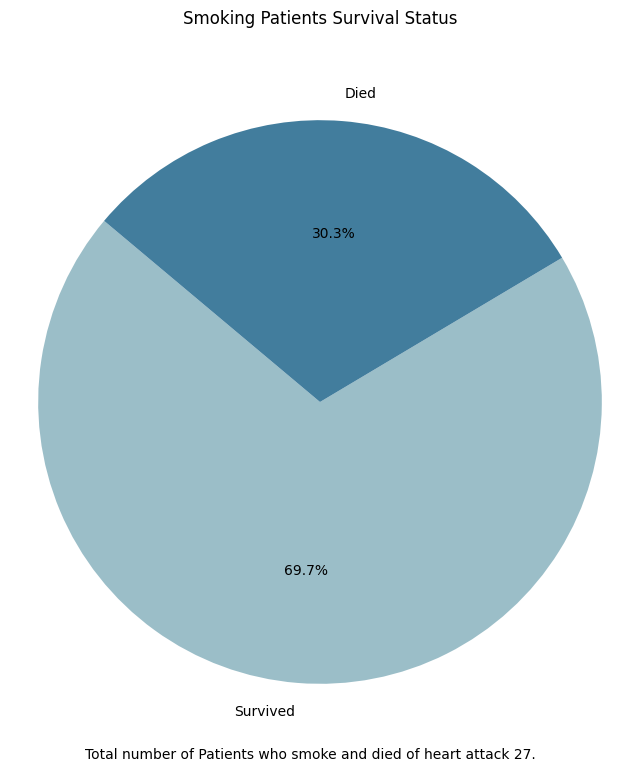

In [ ]:
labels = ['Survived', 'Died']
sizes = [dfq4_total - num_patients_death_who_smoke, num_patients_death_who_smoke]
colors = ['#9BBEC8', '#427D9D']
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Smoking Patients Survival Status\n\n\n')
textstr = f"\n\nTotal number of Patients who smoke and died of heart attack {num_patients_death_who_smoke}."
plt.gcf().text(0.5, 0.05, textstr, ha='center')
plt.show()

# **patients died of high bp**

In [ ]:
dfq3=transformed_df[['high bp','death']]
dfq3 = dfq3.loc[dfq3['high bp'] == 1]
dfq3

,high bp,death
0,1,dead
5,1,dead
9,1,dead
10,1,dead
11,1,dead
...,...,...
255,1,not dead
257,1,not dead
270,1,not dead
275,1,not dead


In [ ]:
dfq3_total = dfq3['high bp'].count()
print(f"The total number of patients with High bp is {dfq1_total}.")
dfq3_death = dfq3.loc[dfq3['death'] == 'dead']
num_patients_death_with_highbp = dfq3_death.shape[0]
print(f"The total number of patients who has high bp and died of Heart Attack is {num_patients_death_with_highbp}.")

The total number of patients with High bp is 121.
The total number of patients who has high bp and died of Heart Attack is 37.


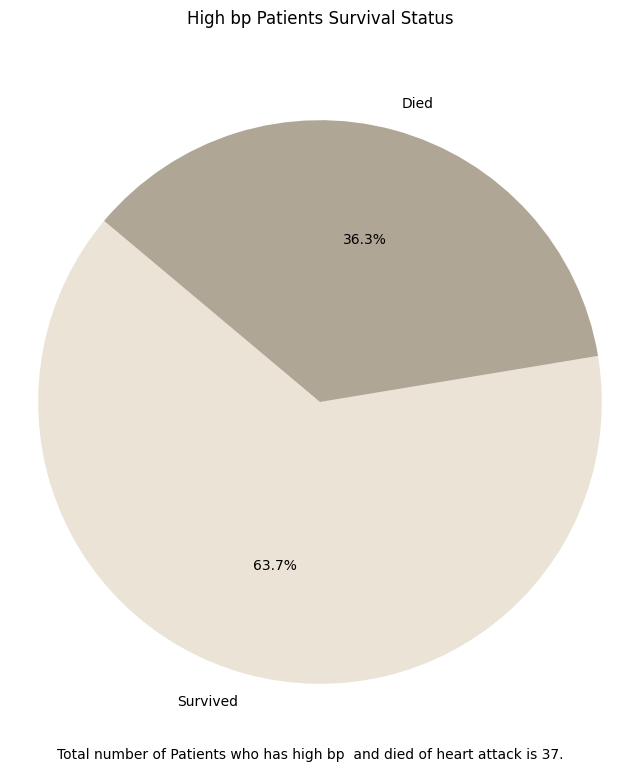

In [ ]:
labels = ['Survived', 'Died']
sizes = [dfq3_total - num_patients_death_with_highbp, num_patients_death_with_highbp]
colors = ['#EBE3D5', '#B0A695']
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('High bp Patients Survival Status\n\n\n')
textstr = f"\n\nTotal number of Patients who has high bp  and died of heart attack is {num_patients_death_with_highbp}."
plt.gcf().text(0.5, 0.05, textstr, ha='center')
plt.show()

# **Age Distribution of People who died from Heart Attack**

In [ ]:
age_df = transformed_df[['age','death']]
age_df

,age,death
0,75.0,dead
1,55.0,dead
2,65.0,dead
3,50.0,dead
4,65.0,dead
...,...,...
293,63.0,not dead
294,62.0,not dead
295,55.0,not dead
297,45.0,not dead


In [ ]:
age_dead = age_df[age_df['death'] == 'dead']
age_dead

,age,death
0,75.0,dead
1,55.0,dead
2,65.0,dead
3,50.0,dead
4,65.0,dead
...,...,...
217,54.0,dead
220,73.0,dead
246,55.0,dead
262,65.0,dead


In [ ]:
age_dead = age_df['death'].count()
print(f"The total number of people who died from Heart Attack is {age_dead}.")

The total number of people who died from Heart Attack is 278.


In [ ]:
age_df['age'].describe()

count    278.000000
mean      60.573144
std       11.763243
min       40.000000
25%       50.250000
50%       60.000000
75%       69.000000
max       95.000000
Name: age, dtype: float64

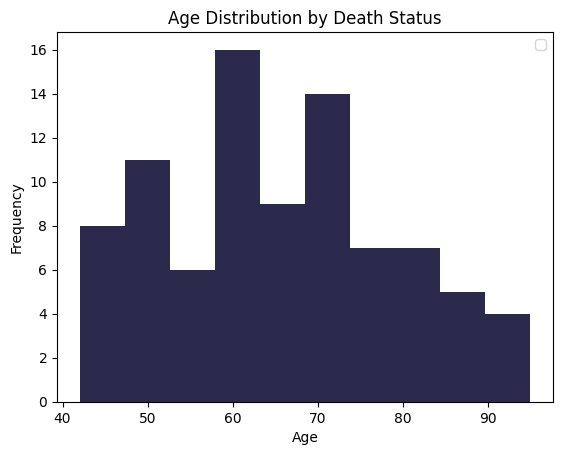

The average age is 60.57


In [ ]:
fig, ax = plt.subplots()
ax.hist(age_df[age_df['death'] == 'dead']['age'], color='#2B2A4C')
ax.set_xlabel('Age')
ax.set_ylabel('Frequency')
ax.set_title('Age Distribution by Death Status')
ax.legend()
plt.show()
print(f"The average age is {age_df['age'].mean():.2f}")

# **Death count by conditions**

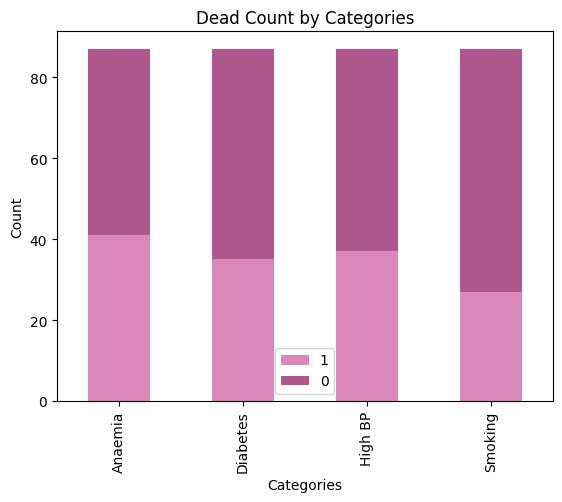

In [ ]:
dead_df = transformed_df[transformed_df['death'] == 'dead']
count_data = pd.DataFrame({
    'Anaemia': dead_df['anaemia'].value_counts(),
    'Diabetes': dead_df['diabetes'].value_counts(),
    'High BP': dead_df['high bp'].value_counts(),
    'Smoking': dead_df['smoking'].value_counts(),
})
count_data = count_data.iloc[::-1]
count_data.T.plot(kind='bar', stacked=True, color=['#D988B9', '#B0578D'])
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Dead Count by Categories')
plt.show()

In [ ]:
transformed_df

,age,anaemia,creatinine phosphokinase,diabetes,ejection fraction,high bp,platelets,serum creatinine,serum sodium,sex,smoking,death
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,dead
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,dead
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,dead
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,dead
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,dead
...,...,...,...,...,...,...,...,...,...,...,...,...
293,63.0,1,103,1,35,0,179000.00,0.9,136,1,1,not dead
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,not dead
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,not dead
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,not dead


In [ ]:
data_tree_df=transformed_df.copy()
data_tree_df.loc[:,'anaemia'].replace({0:'negative',1:'positive'},inplace=True)
data_tree_df.loc[:,'diabetes'].replace({0:'negative',1:'positive'},inplace=True)
data_tree_df.loc[:,'high bp'].replace({0:'negative',1:'positive'},inplace=True)
data_tree_df.loc[:,'smoking'].replace({0:'negative',1:'positive'},inplace=True)
data_tree_df.loc[:,'sex'].replace({0:'female',1:'male'},inplace=True)
data_tree_df

,age,anaemia,creatinine phosphokinase,diabetes,ejection fraction,high bp,platelets,serum creatinine,serum sodium,sex,smoking,death
0,75.0,negative,582,negative,20,positive,265000.00,1.9,130,male,negative,dead
1,55.0,negative,7861,negative,38,negative,263358.03,1.1,136,male,negative,dead
2,65.0,negative,146,negative,20,negative,162000.00,1.3,129,male,positive,dead
3,50.0,positive,111,negative,20,negative,210000.00,1.9,137,male,negative,dead
4,65.0,positive,160,positive,20,negative,327000.00,2.7,116,female,negative,dead
...,...,...,...,...,...,...,...,...,...,...,...,...
293,63.0,positive,103,positive,35,negative,179000.00,0.9,136,male,positive,not dead
294,62.0,negative,61,positive,38,positive,155000.00,1.1,143,male,positive,not dead
295,55.0,negative,1820,negative,38,negative,270000.00,1.2,139,female,negative,not dead
297,45.0,negative,2413,negative,38,negative,140000.00,1.4,140,male,positive,not dead


In [ ]:
import pandas as pd
from collections import Counter
import math

attributes = ['anaemia', 'high bp', 'diabetes', 'smoking', 'death']
df_subset = data_tree_df[attributes]

def entropy(labels):
    label_counts = Counter(labels)
    entropy = 0.0
    for count in label_counts.values():
        probability = count / len(labels)
        entropy -= probability * math.log2(probability)
    return entropy

def choose_best_attribute(df, attributes):
    base_entropy = entropy(df['death'])
    best_info_gain = 0.0
    best_attribute = None
    for attribute_name in attributes[:-1]:  # Exclude the 'death' column
        new_entropy = 0.0
        for attribute_value in set(df[attribute_name]):
            subset = df[df[attribute_name] == attribute_value]
            probability = len(subset) / len(df)
            new_entropy += probability * entropy(subset['death'])
        info_gain = base_entropy - new_entropy
        if info_gain > best_info_gain:
            best_info_gain = info_gain
            best_attribute = attribute_name
    return best_attribute

def majority_vote(labels):
    label_counts = Counter(labels)
    majority_label = label_counts.most_common(1)[0][0]
    return majority_label

def build_decision_tree(df, attributes):
    labels = df['death']
    if len(set(labels)) == 1:
        return labels.iloc[0]
    if len(attributes) == 0:
        return majority_vote(labels)
    best_attribute = choose_best_attribute(df, attributes)
    if best_attribute is None:
        return majority_vote(labels)
    decision_tree = {best_attribute: {}}
    for attribute_value in set(df[best_attribute]):
        subset = df[df[best_attribute] == attribute_value]
        new_attributes = [attr for attr in attributes if attr != best_attribute]
        decision_tree[best_attribute][attribute_value] = build_decision_tree(subset, new_attributes)
    return decision_tree

def print_decision_tree(decision_tree, indent=''):
    if isinstance(decision_tree, dict):
        attribute = next(iter(decision_tree))
        print(indent + attribute + ':')
        for value, subtree in decision_tree[attribute].items():
            print(indent + '  |-- ' + str(value))
            print_decision_tree(subtree, indent + '  |   ')
    else:
        print(indent + '  |-- ' + str(decision_tree))

# Build and print the decision tree
decision_tree_subset = build_decision_tree(df_subset, attributes)
print_decision_tree(decision_tree_subset)


high bp:
  |-- positive
  |   smoking:
  |     |-- positive
  |     |   diabetes:
  |     |     |-- positive
  |     |     |   anaemia:
  |     |     |     |-- positive
  |     |     |     |     |--  not dead
  |     |     |     |-- negative
  |     |     |     |     |-- dead
  |     |     |-- negative
  |     |     |   anaemia:
  |     |     |     |-- positive
  |     |     |     |     |-- dead
  |     |     |     |-- negative
  |     |     |     |     |--  not dead
  |     |-- negative
  |     |   diabetes:
  |     |     |-- positive
  |     |     |   anaemia:
  |     |     |     |-- positive
  |     |     |     |     |--  not dead
  |     |     |     |-- negative
  |     |     |     |     |--  not dead
  |     |     |-- negative
  |     |     |   anaemia:
  |     |     |     |-- positive
  |     |     |     |     |--  not dead
  |     |     |     |-- negative
  |     |     |     |     |--  not dead
  |-- negative
  |   smoking:
  |     |-- positive
  |     |   diabetes:
  |     |   

In [ ]:
2356

2356